## 시계열에 따른 초, 중, 고 중등교육 기관 폐교 및 해산 수 예측 모델 구현
#### Implementation of a model for predicting the number of closures and dissolution of elementary, middle, and high school education institutions over time

- 프로젝트 진행 기간 : 2024. 04. 12. ~ 2024. 04. 14.
  
- 팀 구성 : 컴퓨터공학부 임규연, 생명과학과 이태민, 경제학과 윤동영, 경영학부 이윤기
- 프로그래밍 1 (데이터 전처리, linear regression model 구현, model fit) : 임규연 (2024. 04. 12 작성)
- 프로그래밍 2 (matplotlib을 이용한 시계열 데이터 시각화) : 이태민 (2024. 04. 14 작성)

-------

### 데이터 개요 및 테크
  본 팀은 공공데이터포탈에서 제공하는 **'전국폐교재산기본정보표준데이터(2024. 03. 06 공시)'** dataframe 데이터를 활용하여 시계열에 따른 초, 중, 고 중등교육 기관 폐교 및 해산 수를 linear regression 모델로 분석한다. 추후에 얼마나 많은 중등교육기관이 존속될 지를 prediction한다. 
  
  - **데이터 이름** : 전국폐교재산기본정보표준데이터 (https://www.data.go.kr/data/15107729/standard.do)
  - **데이터 공시 일자** : 2024. 03. 06
  - **데이터의 시계열 범위** : 1905 ~ 2023년도
  - **데이터의 속성값** : 시도코드, 시도명, 폐교명, 폐교연도, 제공기관명 등 

본 모델을 구현할 테크는 아래와 같다.

  - **데이터 읽기 및 전처리 테크닉** : pandas
  - **모델링 및 머신러닝 라이브러리** : scikit-learn
  - **선형대수학 및 tensor 이용** : numpy
  - **데이터 시각화** : matplotlib

------

### 데이터 전처리 및 데이터 분석
- 2024.04.12. 전처리 완료 (담당 : 임규연)

데이터를 전처리한다. 모집단의 데이터 양식은 csv이기 때문에 전처리 및 데이터 분석을 위해 pandas 라이브러리를 사용한다.
데이터를 전처리하여 정렬된 표본 내에서, 아래와 같은 변수를 추출해낼 것이다.

- **data** : 모집단 (원본 데이터)
- **X_train (X축)** : 연도 데이터
- **y_train (y축)** : 각 연도별로 초, 중, 고 교육기관 폐교 및 해산 횟수

In [1]:
import pandas as pd

In [2]:
# pandas로 csv 모집단 데이터를 읽는다

data = pd.read_csv ('./전국폐교재산기본정보표준데이터.csv', encoding='utf-8')
data.head()

,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,시도코드,시도명,시군구코드,시군구명,폐교명,폐교연도,...,활용현황구분명,건물연면적,대지,담당자 부서명,담당자 전화번호,소재지도로명주소,소재지지번주소,데이터기준일자,제공기관코드,제공기관명
0,7801000,강원특별자치도교육청,7832000,강릉교육지원청,51,강원특별자치도,150,강릉시,성산초 보광분교장,1998,...,대부,466.65,115445.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 성산면 보광리 308,2023-07-01,7801000,강원특별자치도교육청
1,7801000,강원특별자치도교육청,7832000,강릉교육지원청,51,강원특별자치도,150,강릉시,제비초등학교,1999,...,대부,889.50,198643.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 구정면 제비리 504,2023-07-01,7801000,강원특별자치도교육청
2,7801000,강원특별자치도교육청,7832000,강릉교육지원청,51,강원특별자치도,150,강릉시,연곡초 퇴곡분교장,2000,...,대부,838.65,611654.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 연곡면 퇴곡리 225,2023-07-01,7801000,강원특별자치도교육청
3,7801000,강원특별자치도교육청,7832000,강릉교육지원청,51,강원특별자치도,150,강릉시,성덕초 병산분교장,2004,...,자체활용,1025.54,14035.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 병산동 445-5,2023-07-01,7801000,강원특별자치도교육청
4,7801000,강원특별자치도교육청,7832000,강릉교육지원청,51,강원특별자치도,150,강릉시,왕산초 고단분교장,2010,...,대부,771.00,38804.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 왕산면 고단리 32-18,2023-07-01,7801000,강원특별자치도교육청


In [3]:
# 위 데이터의 행과 열 갯수를 출력한다

print ("tuple 갯수, 열 갯수 :", len(data), data.shape[1])

# 맨 위 속성 tuple을 제외한다면 tuple 갯수는 1184, 열 갯수는 21로 확인할 수 있다.
# 속성 tuple : 시도교육청코드, 시도교육청명... 각 열을 명칭하는 행을 의미

tuple 갯수, 열 갯수 : 1184 21


In [4]:
# X_train, y_train을 추출해내기 위해 '폐교연도'에 따른 '폐교명' 리스트를 만든다.

closed_school = [] # [폐교연도, 폐교명]이 들어갈 폐교 리스트

for index in range (len(data)) : # 데이터의 갯수만큼 반복문을 돌린다.
    closed_school.append ([data['폐교연도'][index], data['폐교명'][index]])
    # 폐교연도 열의 index번째 compo와 폐교명 열의 index번째 compo를 폐교 리스트에 넣는다 
    
closed_school[:5]

[[1998, '성산초 보광분교장'],
 [1999, '제비초등학교'],
 [2000, '연곡초 퇴곡분교장'],
 [2004, '성덕초 병산분교장'],
 [2010, '왕산초 고단분교장']]

In [5]:
# closed_school 리스트를 시간 오름차순으로 정렬한다.

closed_school.sort (key = lambda x : (x[0]))
closed_school[:5]

[[1905, '감곡초 상평분교'],
 [1976, '용유초등학교 을왕분교'],
 [1978, '구)진주중앙중학교'],
 [1981, '(구)북암초'],
 [1981, '벽탄초 마항분교장']]

In [6]:
# y_train은 각 연도별 폐교 수이므로 X_train 연도 별 폐교 수가 필요함.
# 따라서 y_train을 만들기 위해 아래와 같이 dictionary 자료형을 사용하여
# 연도 key에 따라 value값을 1 증가시키도록 구현

# key : 연도 (X_train)
# value : 연도별 폐교 수 (y_train)

data_dict = dict()

for component in closed_school : 
    try : 
        data_dict[component[0]] += 1 # year key가 있으면 횟수를 1 증가
        
    except : 
        data_dict[component[0]] = 1 # dictionary에 year key가 없으면 하나 만든다

data_dict

{1905: 1,
 1976: 1,
 1978: 1,
 1981: 2,
 1983: 2,
 1989: 3,
 1990: 10,
 1991: 31,
 1992: 56,
 1993: 43,
 1994: 82,
 1995: 77,
 1996: 41,
 1997: 40,
 1998: 58,
 1999: 182,
 2000: 30,
 2001: 17,
 2002: 24,
 2003: 8,
 2004: 17,
 2005: 13,
 2006: 9,
 2007: 33,
 2008: 29,
 2009: 38,
 2010: 24,
 2011: 16,
 2012: 32,
 2013: 23,
 2014: 20,
 2015: 20,
 2016: 25,
 2017: 30,
 2018: 24,
 2019: 36,
 2020: 24,
 2021: 17,
 2022: 27,
 2023: 18}

In [7]:
# 위 데이터 중 1994 ~ 1999는 극단치로써, 모델링에 해를 가하므로 dictionary에서 삭제
# 데이터 극단치는 모델의 성능을 저하시킨다 (overfitting)

for year in range (1994, 2000) :
    try : 
        data_dict.pop(year)
    except : 
        pass

In [8]:
# X_train이 위 data_dict에서의 key
# y_train이 위 data_dict에서의 value이므로 아래와 같이 변수 설정

X_train = list(data_dict.keys())
y_train = list(data_dict.values())

--------

### model 구현 및 fit
- 2024.04.12. model 구현 및 fit 완료 (담당 : 임규연)

위 X_train과 y_train 데이터를 이용하여 linear regression model을 구현한다. 향후 X_train은 시각화 과정 중 X축의 시계열을 담당할 것이며, y_train은 y축의 label을 담당할 것이다. 

- **X_bias (X축)** : 연도 데이터
- **y_bias (y축)** : 각 연도별로 초, 중, 고 교육기관 폐교 및 해산 횟수

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

In [10]:
# scikit-learn의 linear_model에 X값, y값을 대입하기 위해선 list에서 array로의 변환이 필요
# 또한 X_train은 -1, 1 방향으로의 reshape 필요
# 따라서 numpy를 통해 array로 변환 + reshape

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)

In [11]:
model = LinearRegression() # linear regression model 생성
model.fit (X_train, y_train) # model에 학습시킴 (fit)

LinearRegression()

In [12]:
print ("model의 기울기 : ", model.coef_) # 기울기 출력 
print ("model의 y절편 : ", model.intercept_) # 절편 출력

model의 기울기 :  [0.26896407]
model의 y절편 :  -517.6494304281346


In [13]:
# prediction test
# 2100년에 폐교 수는 어느 정도로 될 지를 예측

test_pred = model.predict([[2100]])
print ("2100년에 폐교 수 : ", test_pred)

2100년에 폐교 수 :  [47.17511086]


### model 시각화
- 2024.04.13. matplotlib linear regression model 시각화 (담당: 이태민)

X_train과 y_train으로 modeling된 linear regression model을 Matplotlib로 시각화.

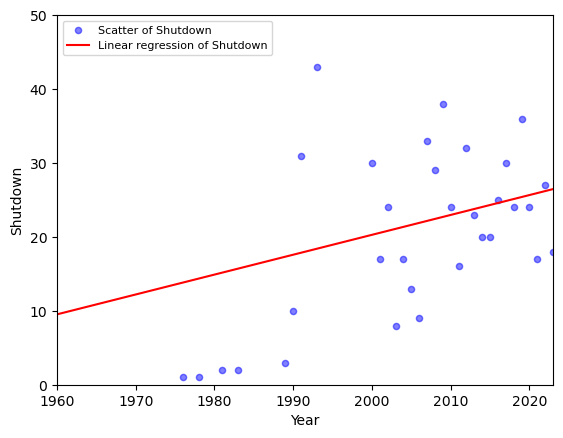

In [15]:
y_pred = model.predict(X_train)

# 연도별 폐교 및 해산 횟수의 산점도
plt.scatter(X_train, y_train, s = 20, alpha = 0.5, color = 'b', label = 'Scatter of Shutdown')
# 연도별 폐교 및 해산 횟수에 따른 선형 회귀 모델
plt.plot(X_train, y_pred, color = 'red', label = 'Linear regression of Shutdown')
plt.xlabel('Year') # x축 연도
plt.ylabel('Shutdown') # y축 폐교 및  해산 횟수
plt.xlim([1960, 2023]) # x축 value 범위 설정
plt.ylim([0, 50]) # y축 value 범위 설정

plt.legend(fontsize = 8, loc = 'upper left')
plt.show()